In [1]:
import torch
import numpy as np
%load_ext autoreload
%autoreload 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
from src.utils.data_utils import CheXpert
import pandas as pd

from torch.utils.data import DataLoader

In [7]:
dataset = CheXpert(
    data_root="../data/chexpert/",
    data_file=pd.read_csv("../data/chexpert/chexpert.csv"),
    disease_name="Cardiomegaly",
    image_size=64,
)

Outcome: not mentioned 
 Style: ('female', '65+')


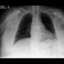

In [13]:
dataset.display(0)

In [14]:
dataset[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 3,
 2)

In [27]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [29]:
next(iter(dataloader)).shape

torch.Size([2, 1, 224, 224])

In [55]:
df = pd.read_csv("../data/chexpert/train.csv")
df = df.loc[df["Age"] != 0]
replacement_dict = {
    0.0: 1,
    1.0: 2,
    -1.0: 3,
    np.nan: 4,
}
df = df.replace(replacement_dict)
df = df.loc[df["Frontal/Lateral"] == "Frontal"]
df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')